Enter the number of layers:  5
Enter the number of neurons in each layer:  10



W array [array([[0.66608444, 0.36040437, 0.44104558, 0.55618997, 0.40836814],
       [0.85476464, 0.47243548, 0.5950956 , 0.68100945, 0.39834783],
       [0.37926032, 0.96324976, 0.1964613 , 0.96888381, 0.60152779],
       [0.39100084, 0.09493433, 0.53201031, 0.77918345, 0.70430088],
       [0.96576799, 0.03023814, 0.08202293, 0.22484231, 0.55248039],
       [0.32339362, 0.2035498 , 0.85757728, 0.61724983, 0.45481405],
       [0.06884654, 0.73414529, 0.26717366, 0.56754465, 0.04467964],
       [0.36139058, 0.62561645, 0.04021596, 0.24209576, 0.29970472],
       [0.62014093, 0.12617802, 0.00792667, 0.461222  , 0.78281395],
       [0.3465259 , 0.04524249, 0.38918345, 0.71555947, 0.73424888]]), array([[0.75521096, 0.72503608, 0.71019212, 0.35438755, 0.13824855,
        0.26455533, 0.68894754, 0.56251022, 0.73238643, 0.62195954],
       [0.44320011, 0.59780598, 0.0075713 , 0.81614407, 0.60507457,
        0.36682792, 0.72352214, 0.36127426, 0.60269984, 0.87664725],
       [0.93787347, 0.26

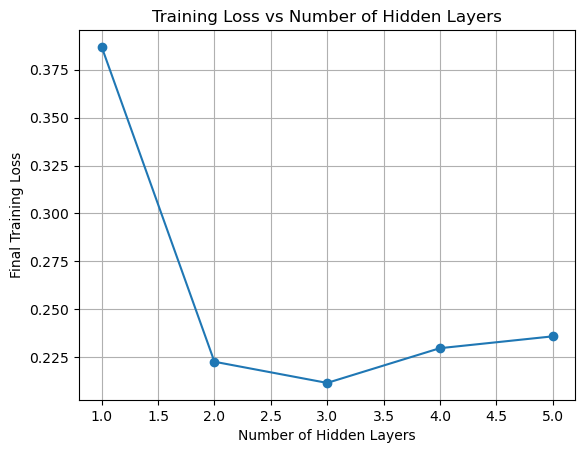

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.exceptions import UndefinedMetricWarning
import warnings

df = pd.read_csv(r"C:\Users\madhu\Downloads\weather_forecast_data (1).csv")


rain_data = df["Rain"].to_numpy()
rain_data = list(rain_data)
for i in range(len(rain_data)):
    if rain_data[i] == "rain":
        rain_data[i] = 1
    else:
        rain_data[i] = 0
Y = np.array(rain_data)


df = df.drop(columns=["Rain"])
X = df.to_numpy()
std = np.std(X, axis=0)
mean = np.mean(X, axis=0)
X = (X - mean) / std


X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)
X_valid, X_test, Y_valid, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)


X_train = np.transpose(X_train)
X_valid = np.transpose(X_valid)
X_test = np.transpose(X_test)


layer = int(input("Enter the number of layers: "))
neuron_no = int(input("Enter the number of neurons in each layer: "))


W = []
for i in range(layer):
    if i == 0:
        weight = np.random.rand(neuron_no, X_train.shape[0])
        W.append(weight)
    elif i == layer - 1:
        weight = np.random.rand(1, neuron_no)
        W.append(weight)
    else:
        weight = np.random.rand(neuron_no, neuron_no)
        W.append(weight)
print("\nW array",W)
b = []
for i in range(layer):
    if i == 0:
        bias = np.random.rand(neuron_no, 1)
        b.append(bias)
    elif i == layer - 1:
        bias = np.random.rand(1, 1)
        b.append(bias)
    else:
        bias = np.random.rand(neuron_no, 1)
        b.append(bias)


print("\nb array",b)


def h(k):
    k = np.clip(k, -500, 500) 
    return 1 / (1 + np.exp(-k))


def cost_entropy(a, y):
    m = len(a)
    loss = 0
    for i in range(m):
        loss += -y[i] * np.log(a[i]) - (1 - y[i]) * np.log(1 - a[i])
    return loss / (2 * m)

def mse(a, y):
    m = len(a)
    loss = 0
    for i in range(m):
        loss += (a[i] - y[i]) ** 2
    return loss / (2 * m)


def gradient_h(z):
    g = h(z)
    return g * (1 - g)


def predict_A_Z(w, B, x):
    Z = []
    A = [x]
    for i in range(len(w)):
        Z.append(np.dot(w[i], A[i]) + B[i])
        A.append(h(Z[i]))
    return [Z, A]


def dZ(z, w, a, y):
    derivative = []
    L = len(z)
    for i in range(L - 1, -1, -1):
        if i == L - 1:
            dz = a[i + 1] - y
        else:
            WT_dZ = np.dot(w[i + 1].T, derivative[-1])
            grad_sigmoid_z = gradient_h(z[i])
            dz = WT_dZ * grad_sigmoid_z
        derivative.append(dz)
    derivative.reverse()
    return derivative

def dW(z, w, a, y):
    m = len(y)  
    z_derivative = dZ(z, w, a, y)
    w_derivative = []
    for i in range(len(w)):
        w_derivative.append((np.dot(z_derivative[i], a[i].T)) / m) # corrected np.array
    return w_derivative


def db(z, w, a, y):
    m = len(y) 
    z_derivative = dZ(z, w, a, y)
    b_derivative = []
    for i in range(len(z_derivative)):
        db_i = np.sum(z_derivative[i], axis=1, keepdims=True) / m
        b_derivative.append(db_i)
    return b_derivative


alpha = 0.001
iter = 1000


for i in range(iter):
    Z, A = predict_A_Z(W, b, X_train)
    dW_layer = dW(Z, W, A, Y_train)
    db_layer = db(Z, W, A, Y_train)
    for j in range(layer):
        W[j] = W[j] - alpha * dW_layer[j]
        b[j] = b[j] - alpha * db_layer[j]
    if all(np.all(dW_layer[j] == 0) and np.all(db_layer[j] == 0) for j in range(layer)):
        print("All gradients are zero. Stopping training.")
        break
print("The final W:", W,"\nThe final b:", b)


Y_valid_pred = predict_A_Z(W, b, X_valid)[1][-1]
Y_valid_pred = np.array(Y_valid_pred).ravel()
Y_valid_predicted = [1 if p >= 0.5 else 0 for p in Y_valid_pred]


Y_test_pred = predict_A_Z(W, b, X_test)[1][-1]
Y_test_pred = np.array(Y_test_pred).ravel()
Y_test_predicted = [1 if p >= 0.5 else 0 for p in Y_test_pred]
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
    print("Validation Accuracy:", accuracy_score(Y_valid, Y_valid_predicted))
    print("Validation Precision:", precision_score(Y_valid, Y_valid_predicted))
    print("Validation Recall:", recall_score(Y_valid, Y_valid_predicted))
    print("Validation F1 Score:", f1_score(Y_valid, Y_valid_predicted))

    print("\nTest Accuracy:", accuracy_score(Y_test, Y_test_predicted))
    print("Test Precision:", precision_score(Y_test, Y_test_predicted))
    print("Test Recall:", recall_score(Y_test, Y_test_predicted))
    print("Test F1 Score:", f1_score(Y_test, Y_test_predicted))
layer_range = range(1, 6)
neuron_no = 15
losses_per_layer = []

for layers in layer_range:
    W_new = []
    for i in range(layers + 1):
        if i == 0:
            W_new.append(np.random.rand(neuron_no, X_train.shape[0]))
        elif i == layers:
            W_new.append(np.random.rand(1, neuron_no))
        else:
            W_new.append(np.random.rand(neuron_no, neuron_no))

    b_new = []
    for i in range(layers + 1):
        if i == layers:
            b_new.append(np.random.rand(1, 1))
        else:
            b_new.append(np.random.rand(neuron_no, 1))

    alpha = 0.001
    iter = 1000
    for _ in range(iter):
        Z_new, A_new = predict_A_Z(W_new, b_new, X_train)
        dW_layer = dW(Z_new, W_new, A_new, Y_train)
        db_layer = db(Z_new, W_new, A_new, Y_train)
        for j in range(layers + 1):
            W_new[j] -= alpha * dW_layer[j]
            b_new[j] -= alpha * db_layer[j]

    final_output = predict_A_Z(W_new, b_new, X_train)[1][-1].ravel()
    loss = cost_entropy(final_output, Y_train)
    losses_per_layer.append(loss)

plt.plot(layer_range, losses_per_layer, marker='o')
plt.title("Training Loss vs Number of Hidden Layers")
plt.xlabel("Number of Hidden Layers")
plt.ylabel("Final Training Loss")
plt.grid(True)
plt.show()

In [31]:
X_test=X_test.T
X_train=X_train.T
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential(
    [
        tf.keras.Input(shape=(X_train.shape[1],)),
        Dense(8, activation='sigmoid', name = 'layer1'),
        Dense(8, activation='sigmoid', name = 'layer2'),
        Dense(1,activation='sigmoid', name = 'layer3')
     ]
)
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
)

model.fit(
    X_train,Y_train,           
    epochs=10,
)

Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6215
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3299 
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2695
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2109
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1754
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1431
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1310
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1050
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0942
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0816


In [35]:
Y_pred_vals=[]
for i in range(len(Y_pred)):
    if Y_pred[i]>=0.5:
        Y_pred_vals.append(1)
    else:
        Y_pred_vals.append(0)
print(confusion_matrix(Y_test,Y_pred_vals))
print(classification_report(Y_test, Y_pred_vals, digits=4))
accuracy = accuracy_score(Y_test, Y_pred_vals)
print("accuracy:",accuracy)

[[324   3]
 [ 13  35]]
              precision    recall  f1-score   support

           0     0.9614    0.9908    0.9759       327
           1     0.9211    0.7292    0.8140        48

    accuracy                         0.9573       375
   macro avg     0.9412    0.8600    0.8949       375
weighted avg     0.9563    0.9573    0.9552       375

accuracy: 0.9573333333333334
